In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Custom Perceptron class with sigmoid activation
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Update weights and bias
            self.weights += self.learning_rate * np.dot(X.T, (y - predictions))
            self.bias += self.learning_rate * np.sum(y - predictions)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.round(predictions)

# Load the training data
train_data = pd.read_csv("train_no_outliers.csv")

# Assuming "Loan_Status" is the target variable
X_train = train_data.drop("Loan_Status", axis=1)
y_train = train_data["Loan_Status"]

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Save the fitted scaler
scaler_filename = "standard_scaler.joblib"
joblib.dump(scaler, scaler_filename)

# Create a custom perceptron model with sigmoid activation
custom_perceptron_model = CustomPerceptron(learning_rate=0.01, n_iterations=1000)

# Train the model on the scaled training data
custom_perceptron_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation set
val_predictions = custom_perceptron_model.predict(X_val_scaled)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
conf_matrix = confusion_matrix(y_val, val_predictions)

print("Accuracy on validation set:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Save the trained custom perceptron model
custom_perceptron_model_filename = "custom_perceptron_model.joblib"
joblib.dump(custom_perceptron_model, custom_perceptron_model_filename)

# print(f"Trained custom perceptron model saved as {custom_perceptron_model_filename}")


Accuracy on validation set: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


# heatmap for the confusion matrix

In [92]:
print("Columns for y_val (true labels):", y_val.head())
print("Columns for val_predictions (predicted labels):", pd.Series(val_predictions).head())


Columns for y_val (true labels): 350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: int64
Columns for val_predictions (predicted labels): 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


In [28]:
!pip install matplotlib
!pip install seaborn 

You should consider upgrading via the 'c:\users\home\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'c:\users\home\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


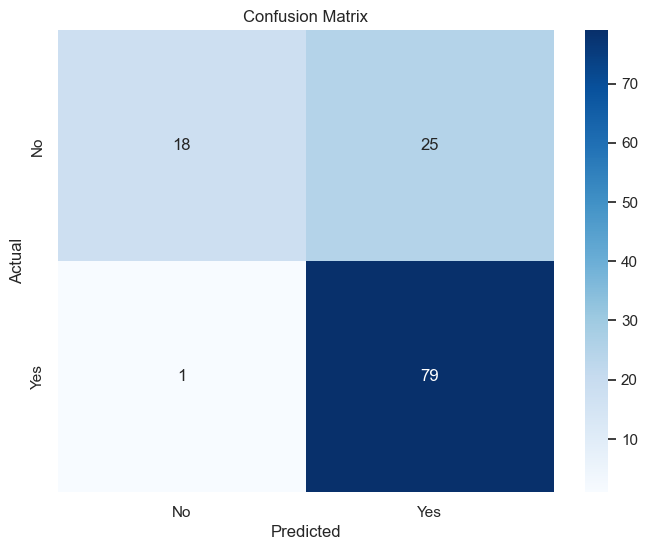

In [84]:
# Create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (6).

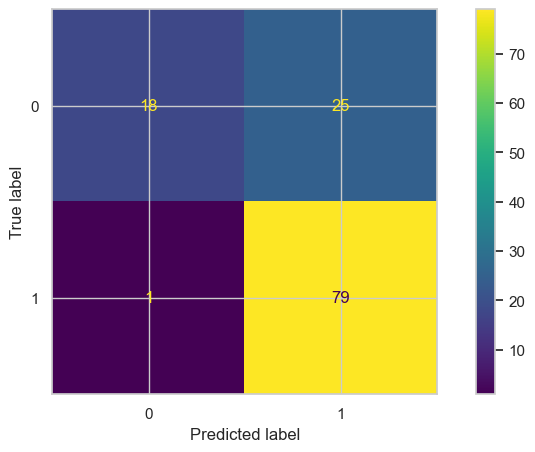

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))

# Use ConfusionMatrixDisplay.from_predictions to create the confusion matrix display
ConfusionMatrixDisplay.from_predictions(y_val, val_preds, ax=ax)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels('Gender')
ax.yaxis.set_ticklabels(target_names)

# Set the title for the plot
_ = ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

# ROC AND AUC curve 

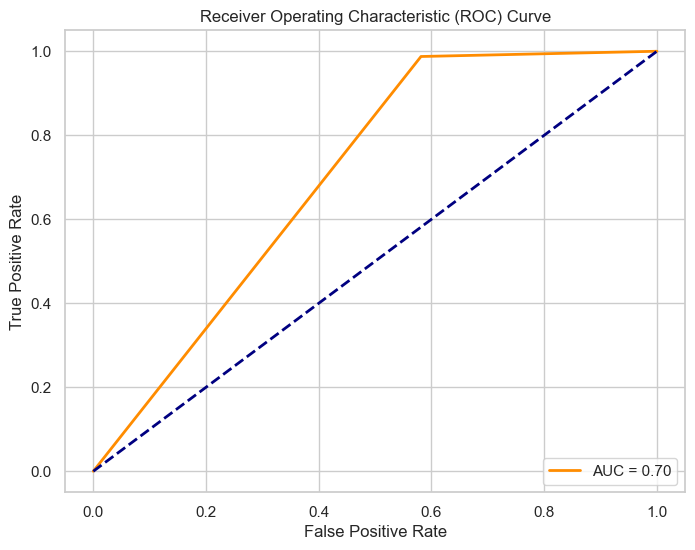

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
!pip install numpy

You should consider upgrading via the 'c:\users\home\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


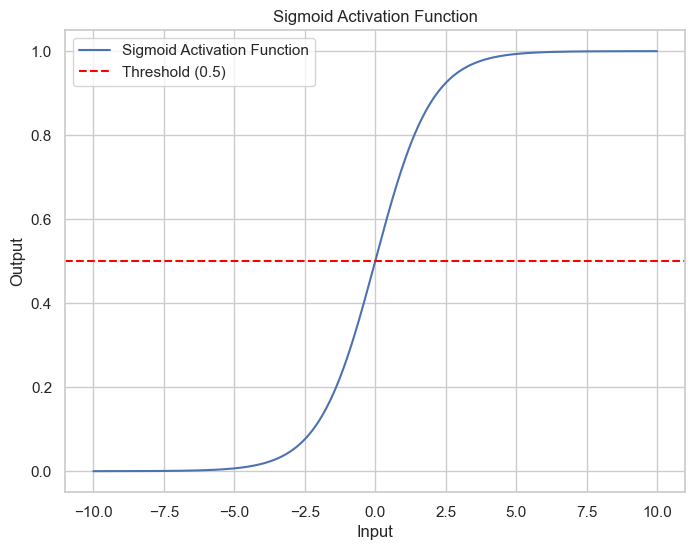

In [76]:
def plot_sigmoid_activation():
    x_values = np.linspace(-10, 10, 1000)
    sigmoid_values = custom_perceptron_model.sigmoid(x_values)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, sigmoid_values, label='Sigmoid Activation Function')
    plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
    plt.title('Sigmoid Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have trained the custom perceptron model as per the previous code
custom_perceptron_model = CustomPerceptron(learning_rate=0.01, n_iterations=1000)
custom_perceptron_model.fit(X_train_scaled, y_train)

# Visualize the sigmoid activation function
plot_sigmoid_activation()

# data distribution chart

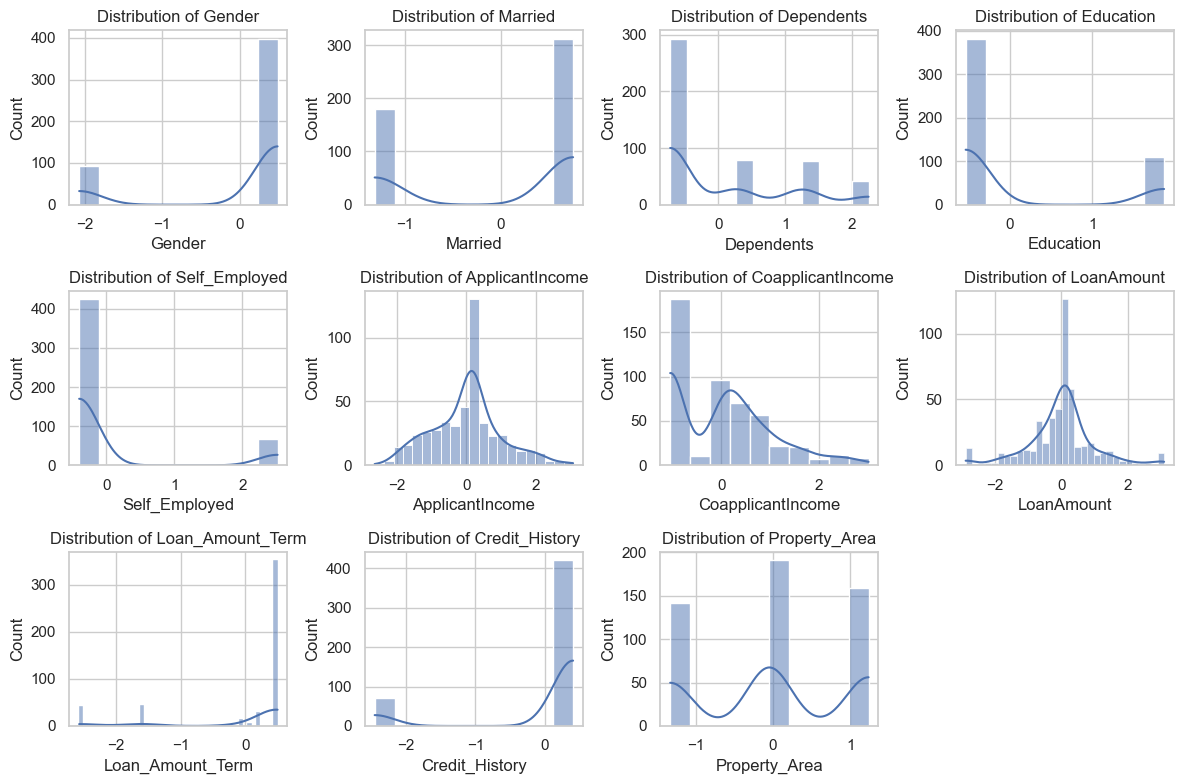

In [77]:
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot data distribution using seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for feature in scaled_train_df.columns:
    plt.subplot(3, 4, scaled_train_df.columns.get_loc(feature) + 1)
    sns.histplot(scaled_train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# calibration curve 


c:\users\home\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


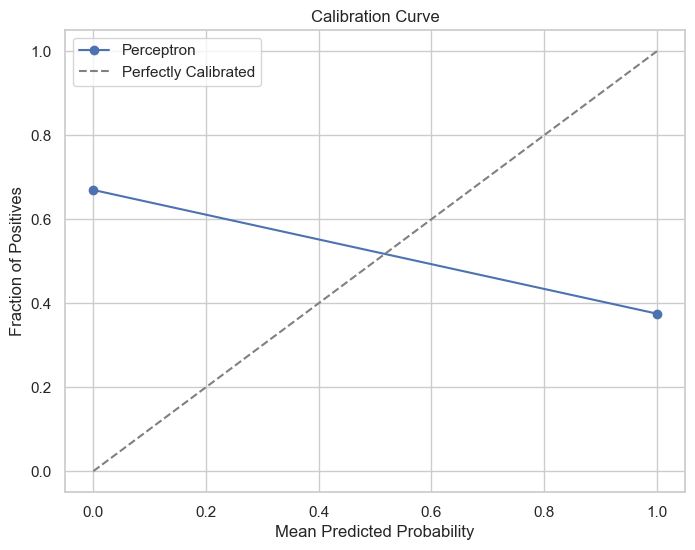

In [60]:
from sklearn.calibration import calibration_curve
val_predictions = perceptron_model.predict(X_val)

# Generate calibration curve
prob_true, prob_pred = calibration_curve(y_val, val_predictions, n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Perceptron')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [107]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained perceptron model
model_filename = "custom_perceptron_model.joblib"
loaded_model = joblib.load(model_filename)

# Assuming your features are ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
# You need to get input from the user for each feature (0 or 1 for categorical features)

user_input = {
    'Gender': int(input("Enter Gender (0 for Female, 1 for Male): ")),
    'Married': int(input("Enter Marital Status (0 for Unmarried, 1 for Married): ")),
    'Dependents': int(input("Enter Number of Dependents: ")),
    'Education': int(input("Enter Education Level (0 for Not Graduate, 1 for Graduate): ")),
    'Self_Employed': int(input("Enter Employment Status (0 for Not Self-Employed, 1 for Self-Employed): ")),
    'ApplicantIncome': float(input("Enter Applicant Income: ")),
    'CoapplicantIncome': float(input("Enter Coapplicant Income: ")),
    'LoanAmount': float(input("Enter Loan Amount: ")),
    'Loan_Amount_Term': float(input("Enter Loan Amount Term: ")),
    'Credit_History': int(input("Enter Credit History (0 or 1): ")),
    'Property_Area': int(input("Enter Property Area (0 for Rural, 1 for Semiurban, 2 for Urban): "))
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input])

# Load the previously fitted StandardScaler
scaler_filename = "standard_scaler.joblib"
scaler = joblib.load(scaler_filename)

# Transform the user input using the fitted scaler
user_input_scaled = scaler.transform(user_input_df)

# Make predictions using the loaded model
user_predictions = loaded_model.predict(user_input_scaled)

# Display the prediction result
print("Loan Status Prediction:")
print("1: Approved" if user_predictions[0] == 1 else "0: Not Approved")


Enter Gender (0 for Female, 1 for Male):  1
Enter Marital Status (0 for Unmarried, 1 for Married):  1
Enter Number of Dependents:  1
Enter Education Level (0 for Not Graduate, 1 for Graduate):  0
Enter Employment Status (0 for Not Self-Employed, 1 for Self-Employed):  


ValueError: invalid literal for int() with base 10: ''

In [ ]:
1	0	0	0	0	5849	0	1	360	1	2	1
1	1	1	0	0	4583	1508	128	360	1	0	0
1	1	3	0	0	3036	2504	158	360	0	1	0

